<a href="https://colab.research.google.com/github/tiffhugh/DATA71200/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question: Is it possible to forecast the likelihood of an individual's usage or non-usage of a particular substance by leveraging their personality traits and demographic data? Moreover, can cluster respondents into discernible cohorts based on their personality characteristics and demographic profiles facilitate the discernment of underlying patterns in drug consumption behaviors?

In [2]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
drug_consumption_quantified = fetch_ucirepo(id=373)

# data (as pandas dataframes)
X = drug_consumption_quantified.data.features
y = drug_consumption_quantified.data.targets
drug_consumption_df = pd.concat([X, y], axis=1)

# metadata
print(drug_consumption_quantified.metadata)
# variable information
print(drug_consumption_quantified.variables)


{'uci_id': 373, 'name': 'Drug Consumption (Quantified)', 'repository_url': 'https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified', 'data_url': 'https://archive.ics.uci.edu/static/public/373/data.csv', 'abstract': 'Classify type of drug consumer by personality data', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1885, 'num_features': 12, 'feature_types': ['Real'], 'demographics': ['Age', 'Gender', 'Education Level', 'Nationality', 'Ethnicity'], 'target_col': ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5TC7S', 'creators': ['Elaine Fehrman', 'Vincent Egan', 'Evgeny Mirkes'], 'intro_paper': {'title': 'T

In [62]:
print(list(drug_consumption_df.columns))

['age', 'gender', 'education', 'country', 'ethnicity', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impuslive', 'ss', 'alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']


In [4]:
# Create binary classification for drug consumption(1- consumes drugs, 0- doesnt consumes drugs)
# 1- (Used last, Month, Week, Day), 0-(Never Used, Used..over a Decade,Last Decade, Year)
def change(x):

    if ((x == 'CL6') or (x == 'CL5') or (x == 'CL4') ):
        x = 1

    elif ((x == 'CL0') or (x == 'CL1') or (x == 'CL2') or (x == 'CL3')):
        x = 0

    return x

In [5]:
columns_to_map = ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa']
# Apply the change function to specified columns
for column in columns_to_map:
    drug_consumption_df[column] = drug_consumption_df[column].apply(lambda x: change(x))

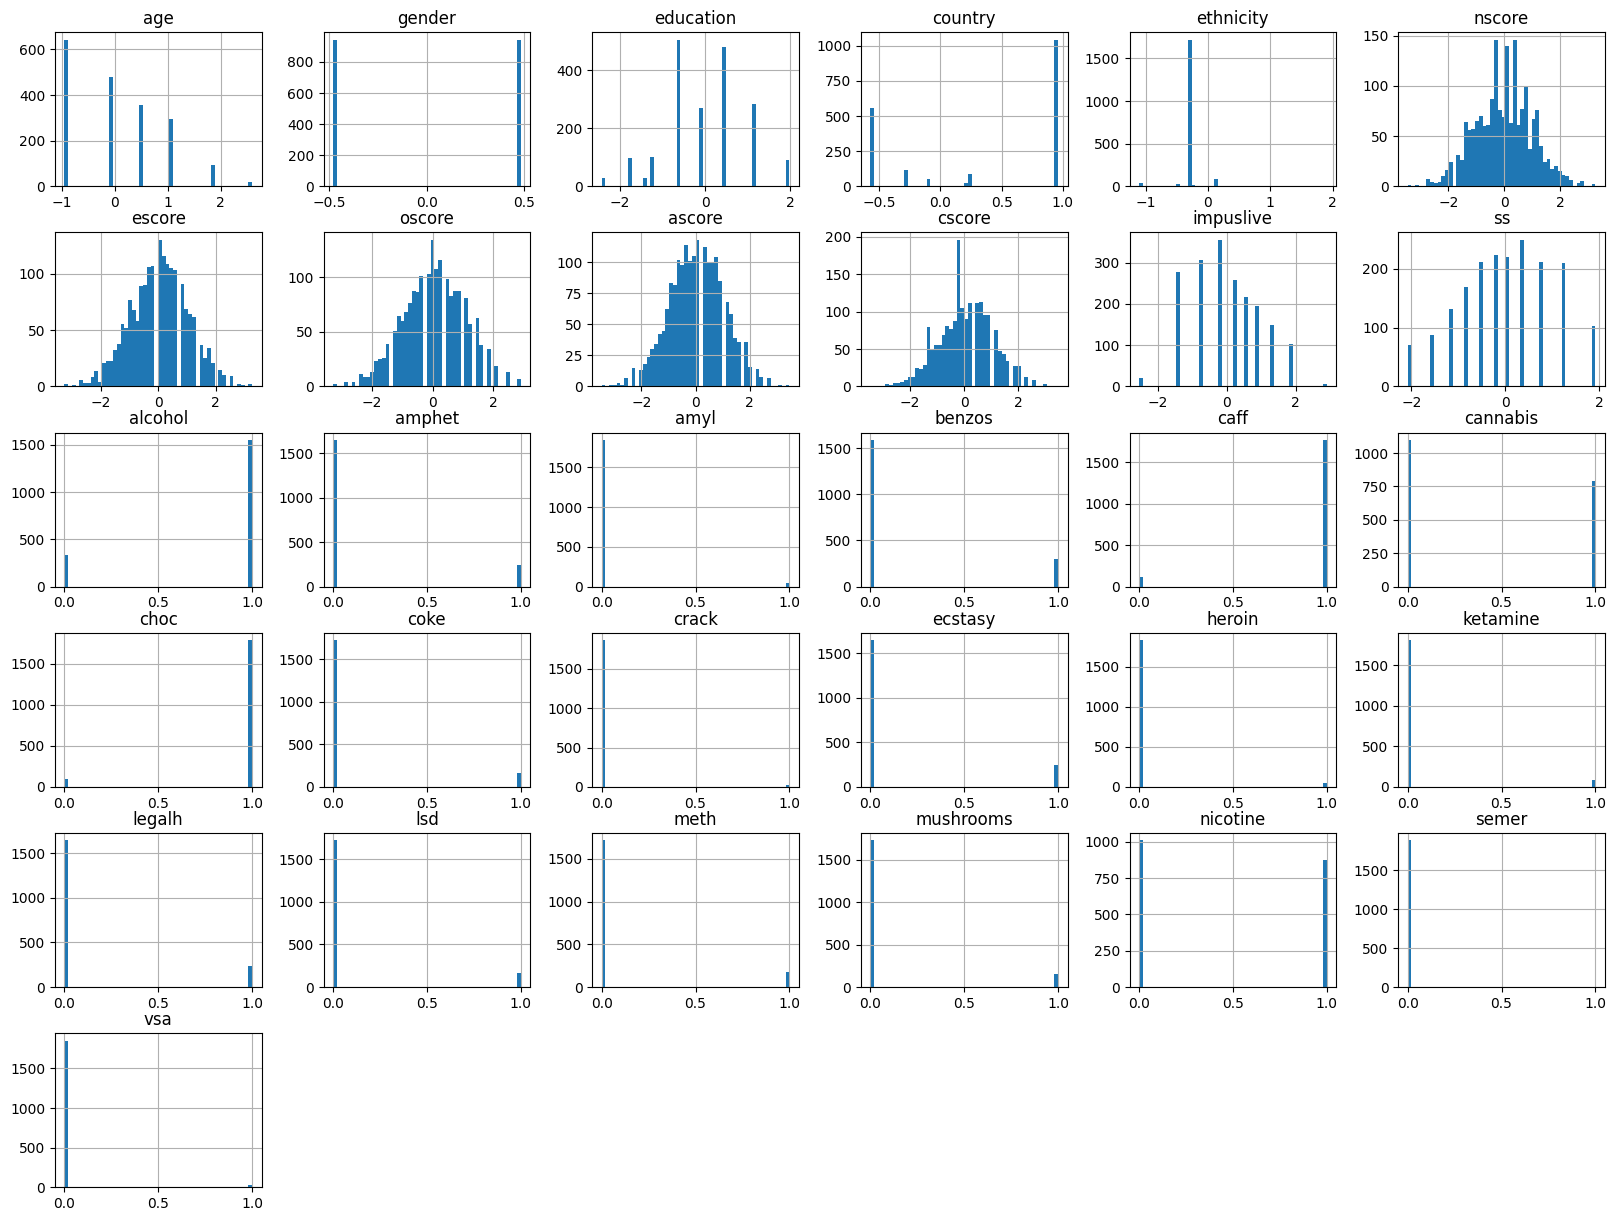

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
drug_consumption_df.hist(bins=50, figsize=(20,15))
plt.show()

I am organizing the drugs based on their psychological and physiological effects. This approach will help understand how different personality traits and demographic factors might influence the likelihood of using substances with similar effects. The categories I will be using is stimulants, depressants, hallucinogens, and the other variables will be dropped.

In [6]:
# Stimulants - caffeine, nicotine, amphet, coke, crack, meth
drug_consumption_df['stimulants'] = drug_consumption_df.apply(lambda x: int((x['caff']  + x['nicotine'] + x['coke'] + x['crack'] + x['meth'] )>0), axis = 1)

In [7]:
# Depressants - alcohol, benzos,heroin
drug_consumption_df['depressants'] = drug_consumption_df.apply(lambda x: int((x['alcohol']  + x['benzos'] + x['heroin'] )>0), axis = 1)

In [8]:
# Hallucinogens - Lsd, mushrooms, ketamine, ecstasy, cannabis
drug_consumption_df['hallucinogens'] = drug_consumption_df.apply(lambda x: int((x['lsd']  + x['mushrooms'] + x['ketamine'] + x['ecstasy'] + x['cannabis'] )>0), axis = 1)

In [9]:
# Drop target variables
drug_consumption_df.drop(['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'], axis = 1, inplace = True)
print(drug_consumption_df)

          age   gender  education  country  ethnicity   nscore   escore  \
0     0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1    -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2     0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3    -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4     0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...       ...      ...        ...      ...        ...      ...      ...   
1880 -0.95197  0.48246   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881 -0.95197 -0.48246   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882 -0.07854  0.48246    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883 -0.95197  0.48246   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1884 -0.95197 -0.48246   -0.61113  0.21128   -0.31685 -0.46725  2.12700   

       oscore   ascore   cscore  impuslive       ss  stimulants  depressants  \
0    -0.58331 -0.91

In [10]:
# Recode gender (1- Female, 0-Male)
def change(x):

    if (x == 0.48246):
        x = 1

    elif (x == -0.48246):
        x = 0

    return x

drug_consumption_df['gender'] = drug_consumption_df['gender'].apply(lambda x: change(x))
print(drug_consumption_df)

          age  gender  education  country  ethnicity   nscore   escore  \
0     0.49788       1   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1    -0.07854       0    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2     0.49788       0   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3    -0.95197       1    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4     0.49788       1    1.98437  0.96082   -0.31685  0.73545 -1.63340   
...       ...     ...        ...      ...        ...      ...      ...   
1880 -0.95197       1   -0.61113 -0.57009   -0.31685 -1.19430  1.74091   
1881 -0.95197       0   -0.61113 -0.57009   -0.31685 -0.24649  1.74091   
1882 -0.07854       1    0.45468 -0.57009   -0.31685  1.13281 -1.37639   
1883 -0.95197       1   -0.61113 -0.57009   -0.31685  0.91093 -1.92173   
1884 -0.95197       0   -0.61113  0.21128   -0.31685 -0.46725  2.12700   

       oscore   ascore   cscore  impuslive       ss  stimulants  depressants  \
0    -0.58331 -0.91699 -0.00665

In [11]:
# Recode Education
# Left school before 16 years                          -> 0
# Left school at 16 years                              -> 1
# Left school at 17 years                              -> 2
# Left school at 18 years                              -> 3
# Some college or university, no certificate or degree -> 4
# Professional certificate/ diploma                    -> 5
# University degree                                    -> 6
# Masters degree                                       -> 7
# Doctorate degree                                     -> 8

def changeEducation(x):

  if (x == -2.43591):
    x = 0
  elif (x == -1.73790):
    x = 1
  elif (x == -1.43719):
    x = 2
  elif (x == -1.22751):
    x = 3
  elif (x == -0.61113):
    x = 4
  elif (x == -0.05921):
    x = 5
  elif (x == 0.45468):
    x = 6
  elif (x == 1.16365):
    x = 7
  elif (x == 1.98437):
    x = 8
  return x

drug_consumption_df['education'] = drug_consumption_df['education'].apply(lambda x: changeEducation(x))
print(drug_consumption_df)

          age  gender  education  country  ethnicity   nscore   escore  \
0     0.49788       1          5  0.96082    0.12600  0.31287 -0.57545   
1    -0.07854       0          8  0.96082   -0.31685 -0.67825  1.93886   
2     0.49788       0          5  0.96082   -0.31685 -0.46725  0.80523   
3    -0.95197       1          7  0.96082   -0.31685 -0.14882 -0.80615   
4     0.49788       1          8  0.96082   -0.31685  0.73545 -1.63340   
...       ...     ...        ...      ...        ...      ...      ...   
1880 -0.95197       1          4 -0.57009   -0.31685 -1.19430  1.74091   
1881 -0.95197       0          4 -0.57009   -0.31685 -0.24649  1.74091   
1882 -0.07854       1          6 -0.57009   -0.31685  1.13281 -1.37639   
1883 -0.95197       1          4 -0.57009   -0.31685  0.91093 -1.92173   
1884 -0.95197       0          4  0.21128   -0.31685 -0.46725  2.12700   

       oscore   ascore   cscore  impuslive       ss  stimulants  depressants  \
0    -0.58331 -0.91699 -0.00665

In [12]:
# Recode country
#Australia -> 0
#Canada    -> 1
#New Zealand->2
#Other     -> 3
#Republic of Ireland ->4
#UK         ->5
#USA        ->6

def changeCountry(x):

  if (x == -0.09765):
    x = 0
  elif (x == 0.24923):
    x = 1
  elif (x == -0.46841):
    x = 2
  elif (x == -0.28519):
    x = 3
  elif (x == 0.21128):
    x = 4
  elif (x == 0.96082):
    x = 5
  elif (x == -0.57009):
    x = 6
  return x

drug_consumption_df['country'] = drug_consumption_df['country'].apply(lambda x: changeCountry(x))
print(drug_consumption_df)

          age  gender  education  country  ethnicity   nscore   escore  \
0     0.49788       1          5        5    0.12600  0.31287 -0.57545   
1    -0.07854       0          8        5   -0.31685 -0.67825  1.93886   
2     0.49788       0          5        5   -0.31685 -0.46725  0.80523   
3    -0.95197       1          7        5   -0.31685 -0.14882 -0.80615   
4     0.49788       1          8        5   -0.31685  0.73545 -1.63340   
...       ...     ...        ...      ...        ...      ...      ...   
1880 -0.95197       1          4        6   -0.31685 -1.19430  1.74091   
1881 -0.95197       0          4        6   -0.31685 -0.24649  1.74091   
1882 -0.07854       1          6        6   -0.31685  1.13281 -1.37639   
1883 -0.95197       1          4        6   -0.31685  0.91093 -1.92173   
1884 -0.95197       0          4        4   -0.31685 -0.46725  2.12700   

       oscore   ascore   cscore  impuslive       ss  stimulants  depressants  \
0    -0.58331 -0.91699 -0.00665

In [13]:
#Recode ethnicty
#Asian  -> 0
#Black  -> 1
#Mixed-Black/Asian -> 2
#Mixed-White/Asian -> 3
#Mixed-White/Black -> 4
#Other             -> 5
#White             -> 6

def changeEthnicity(x):

  if (x == -0.50212):
    x = 0
  elif (x == -1.10702):
    x = 1
  elif (x == 1.90725):
    x = 2
  elif (x == 0.12600):
    x = 3
  elif (x == -0.22166):
    x = 4
  elif (x == 0.11440):
    x = 5
  elif (x == -0.31685):
    x = 6
  return x

drug_consumption_df['ethnicity'] = drug_consumption_df['ethnicity'].apply(lambda x: changeEthnicity(x))

In [14]:
# Recode age
#'18-24' age -> 0
#'25-34' age -> 1
#'35-44' age -> 2
#'45-54' age -> 3
#'55-64' age -> 4
#'65+'   age -> 5

def changeAge(x):
    if (x == -0.95197):
        x = 0
    elif (x == -0.07854):
        x = 1
    elif (x == 0.49788):
        x = 2
    elif (x == 1.09449):
        x = 3
    elif (x == 1.82213):
        x = 4
    elif (x == 2.59171):
        x = 5
    return x
drug_consumption_df['age'] = drug_consumption_df['age'].apply(lambda x: changeAge(x))

In [113]:
drug_consumption_df.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,impuslive,ss,stimulants,depressants,hallucinogens
0,2,1,5,5,3,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0
1,1,0,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1
2,2,0,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,1,1
3,0,1,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,0
4,2,1,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,1


In [15]:
# Update target variables
feature_columns = ['age', 'gender', 'education', 'country', 'ethnicity', 'nscore', 'oscore', 'ascore', 'impuslive', 'ss']
target_columns = ['stimulants', 'depressants', 'hallucinogens']
X = drug_consumption_df[feature_columns]
y = drug_consumption_df[target_columns]

In [16]:
#Divide into a training set and a testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [143]:
#Explore your training set
X_train.describe()
X_train.info()
X_train.head()
y_train.describe()
y_train.info()
y_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 1814 to 1126
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1508 non-null   int64  
 1   gender     1508 non-null   int64  
 2   education  1508 non-null   int64  
 3   country    1508 non-null   int64  
 4   ethnicity  1508 non-null   int64  
 5   nscore     1508 non-null   float64
 6   oscore     1508 non-null   float64
 7   ascore     1508 non-null   float64
 8   impuslive  1508 non-null   float64
 9   ss         1508 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 129.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1508 entries, 1814 to 1126
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   stimulants     1508 non-null   int64
 1   depressants    1508 non-null   int64
 2   hallucinogens  1508 non-null   int64
dtypes: int64(3)
memory usage: 47.1 KB


,stimulants,depressants,hallucinogens
1814,1,1,1
710,1,1,0
931,1,1,0
617,1,1,0
1797,1,0,0


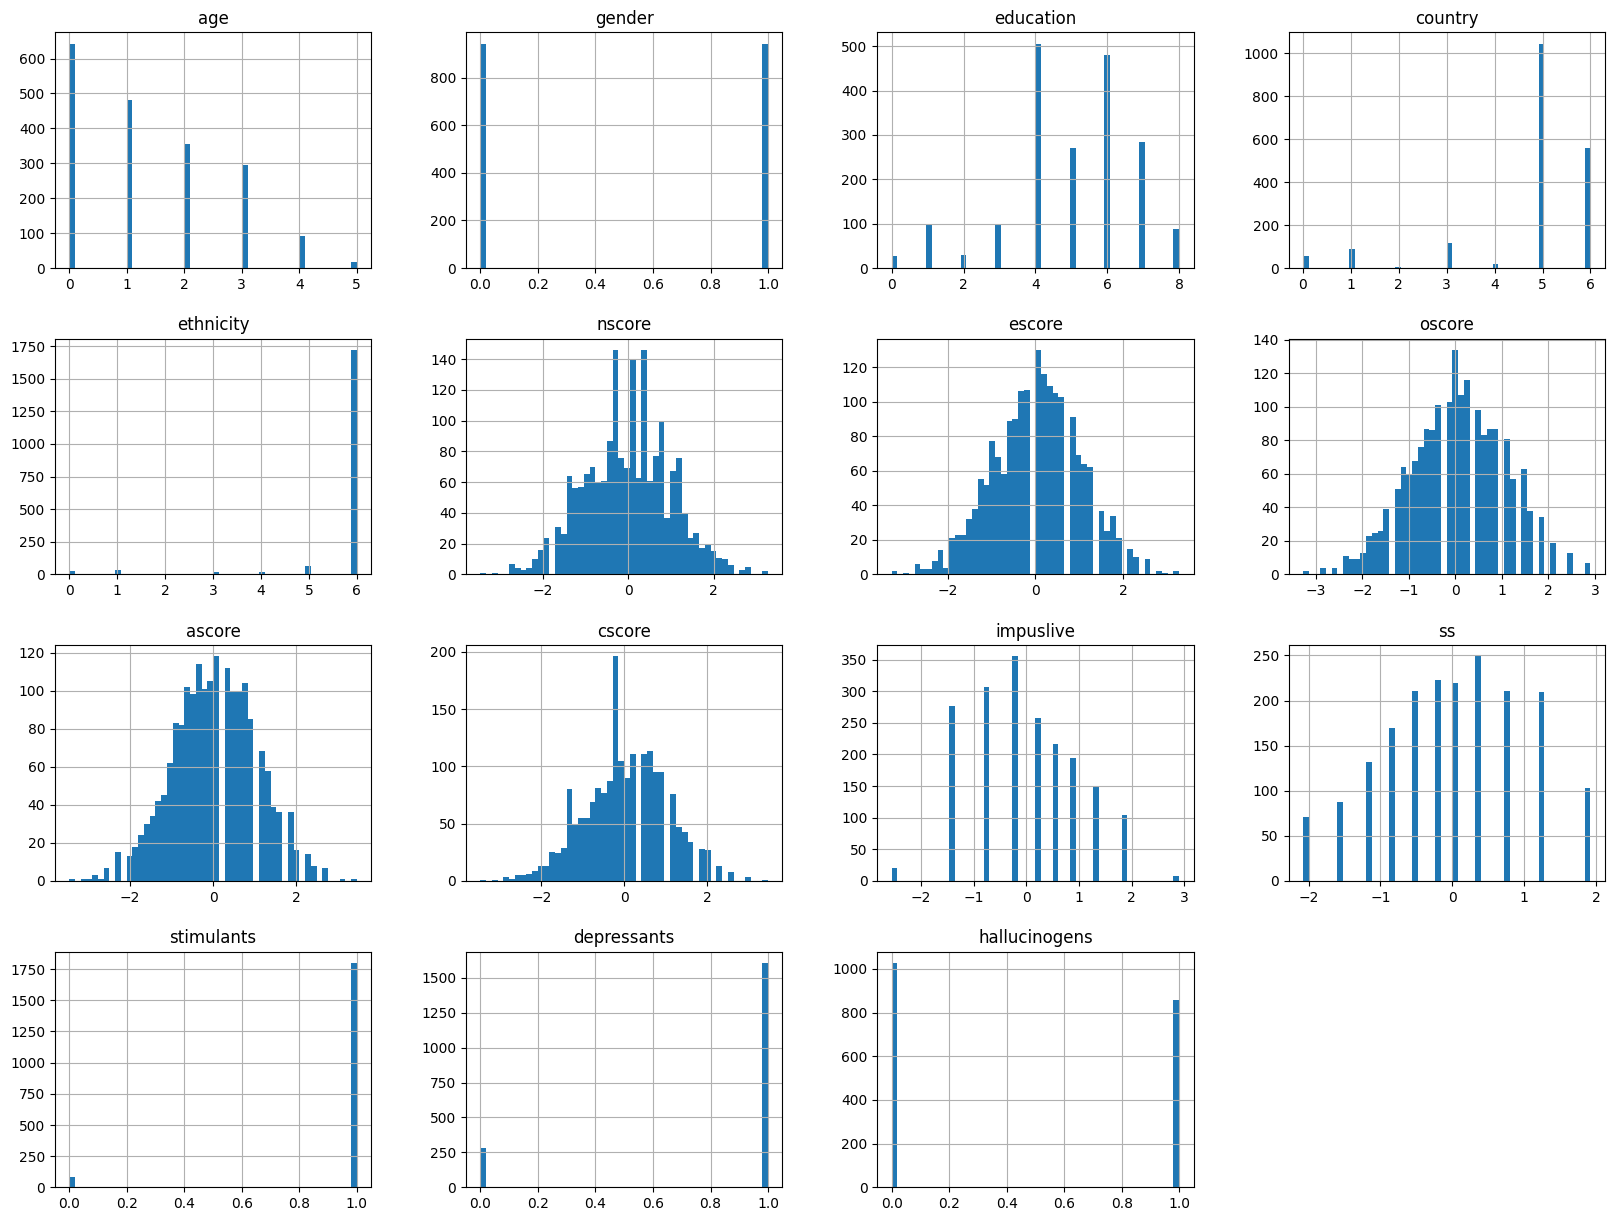

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
drug_consumption_df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<Axes: xlabel='nscore', ylabel='nscore'>,
        <Axes: xlabel='escore', ylabel='nscore'>,
        <Axes: xlabel='oscore', ylabel='nscore'>,
        <Axes: xlabel='ascore', ylabel='nscore'>,
        <Axes: xlabel='cscore', ylabel='nscore'>],
       [<Axes: xlabel='nscore', ylabel='escore'>,
        <Axes: xlabel='escore', ylabel='escore'>,
        <Axes: xlabel='oscore', ylabel='escore'>,
        <Axes: xlabel='ascore', ylabel='escore'>,
        <Axes: xlabel='cscore', ylabel='escore'>],
       [<Axes: xlabel='nscore', ylabel='oscore'>,
        <Axes: xlabel='escore', ylabel='oscore'>,
        <Axes: xlabel='oscore', ylabel='oscore'>,
        <Axes: xlabel='ascore', ylabel='oscore'>,
        <Axes: xlabel='cscore', ylabel='oscore'>],
       [<Axes: xlabel='nscore', ylabel='ascore'>,
        <Axes: xlabel='escore', ylabel='ascore'>,
        <Axes: xlabel='oscore', ylabel='ascore'>,
        <Axes: xlabel='ascore', ylabel='ascore'>,
        <Axes: xlabel='cscore', ylabel='ascore'

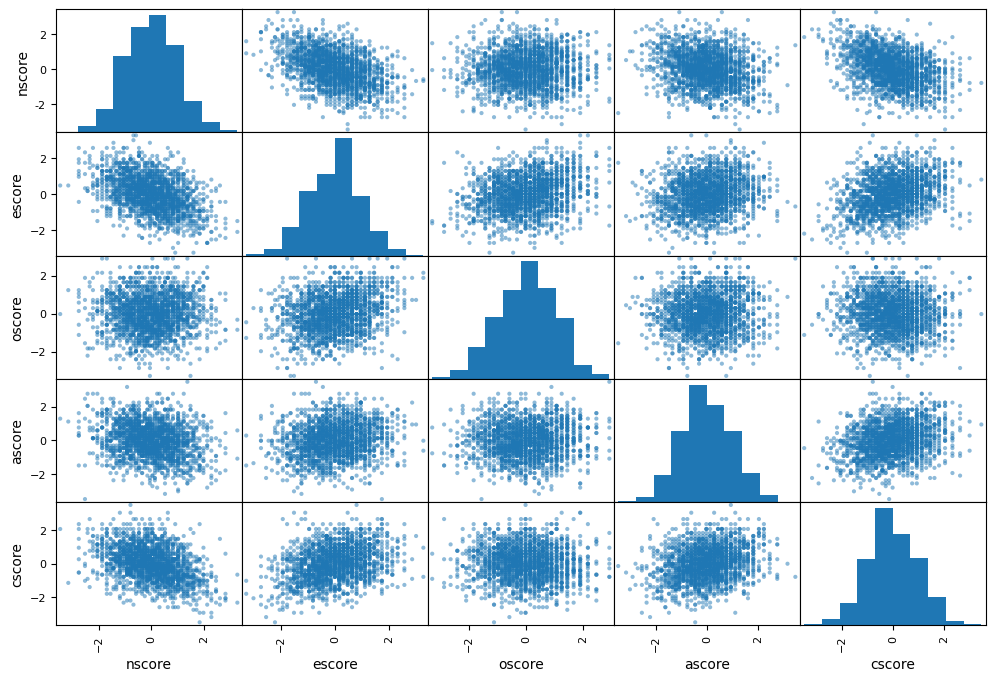

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["nscore", "escore", "oscore","ascore","cscore"]
scatter_matrix(drug_consumption_df[attributes], figsize=(12, 8))

For the transformation I have chosen.: nscore,oscore, age, ethnicty, and country.These variables where selected based on the shape of the histogram in partiular for these variables look like non-normal distribution, so the transformation could help give it more of a normal distribution

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to transform
features_to_transform = ['age', 'ethnicity', 'country', 'nscore', 'oscore']

# Apply transformations
for feature in features_to_transform:
    drug_consumption_df[f'{feature}_squared'] = drug_consumption_df[feature] ** 2
    drug_consumption_df[f'{feature}_cubed'] = drug_consumption_df[feature] ** 3
    # Use np.log1p to handle zero values (log(1 + x))
    drug_consumption_df[f'{feature}_log'] = np.log1p(drug_consumption_df[feature])
    drug_consumption_df[f'{feature}_exp'] = np.exp(drug_consumption_df[feature])


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


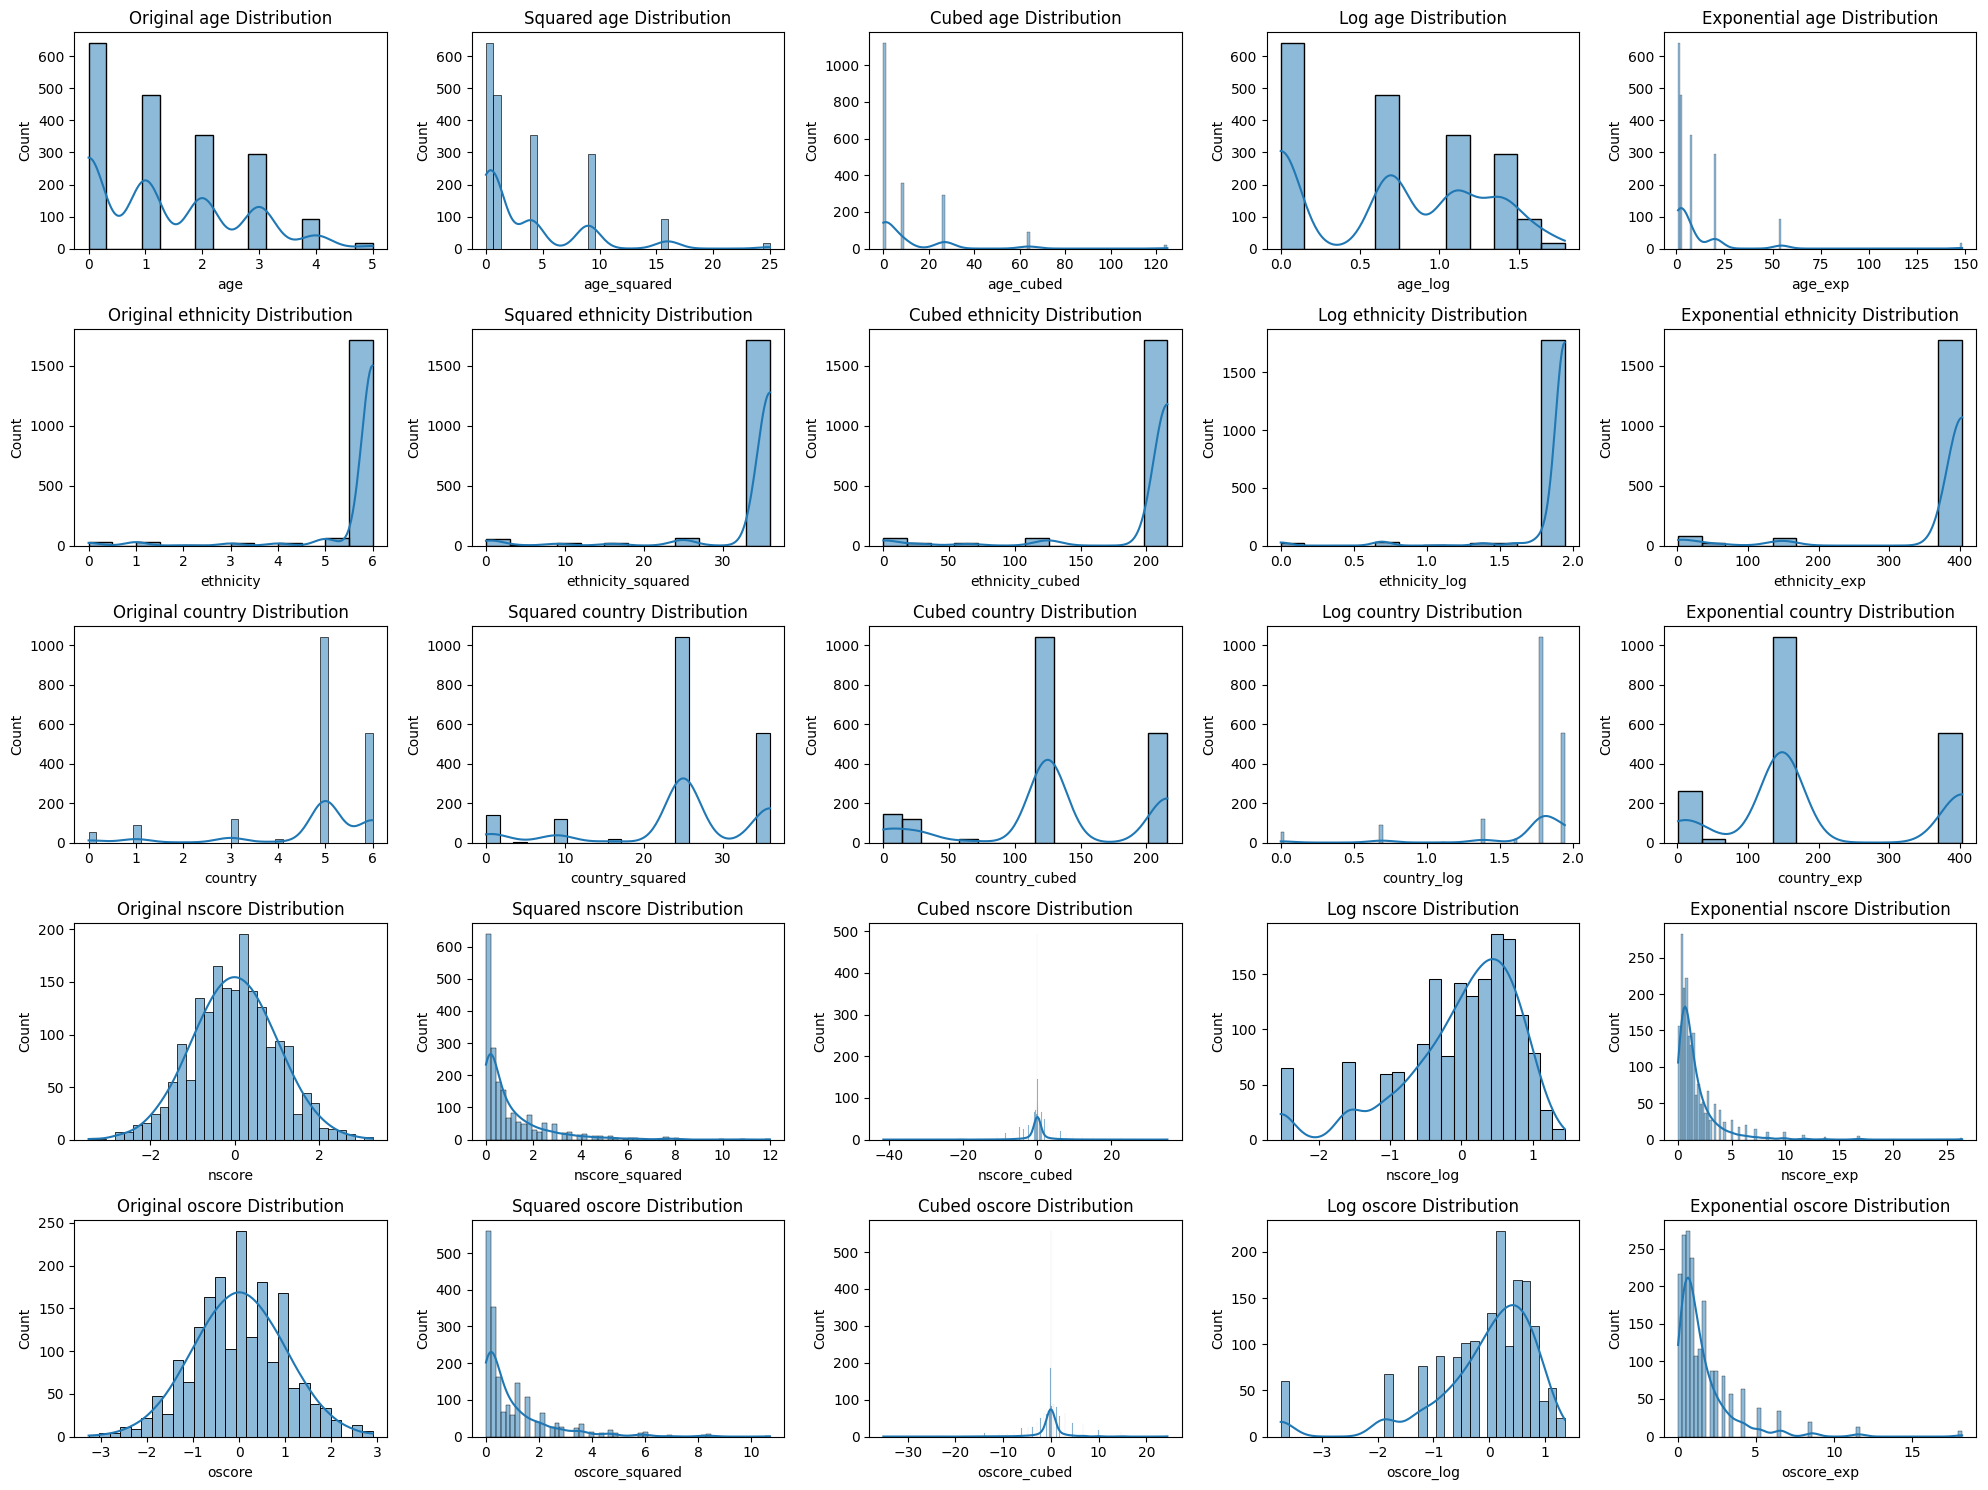

In [22]:
# Plot histograms
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features_to_transform):
    plt.subplot(len(features_to_transform), 5, i*5 + 1)
    sns.histplot(drug_consumption_df[feature], kde=True)
    plt.title(f'Original {feature} Distribution')

    plt.subplot(len(features_to_transform), 5, i*5 + 2)
    sns.histplot(drug_consumption_df[f'{feature}_squared'], kde=True)
    plt.title(f'Squared {feature} Distribution')

    plt.subplot(len(features_to_transform), 5, i*5 + 3)
    sns.histplot(drug_consumption_df[f'{feature}_cubed'], kde=True)
    plt.title(f'Cubed {feature} Distribution')

    plt.subplot(len(features_to_transform), 5, i*5 + 4)
    sns.histplot(drug_consumption_df[f'{feature}_log'], kde=True)
    plt.title(f'Log {feature} Distribution')

    plt.subplot(len(features_to_transform), 5, i*5 + 5)
    sns.histplot(drug_consumption_df[f'{feature}_exp'], kde=True)
    plt.title(f'Exponential {feature} Distribution')

plt.tight_layout()
plt.show()


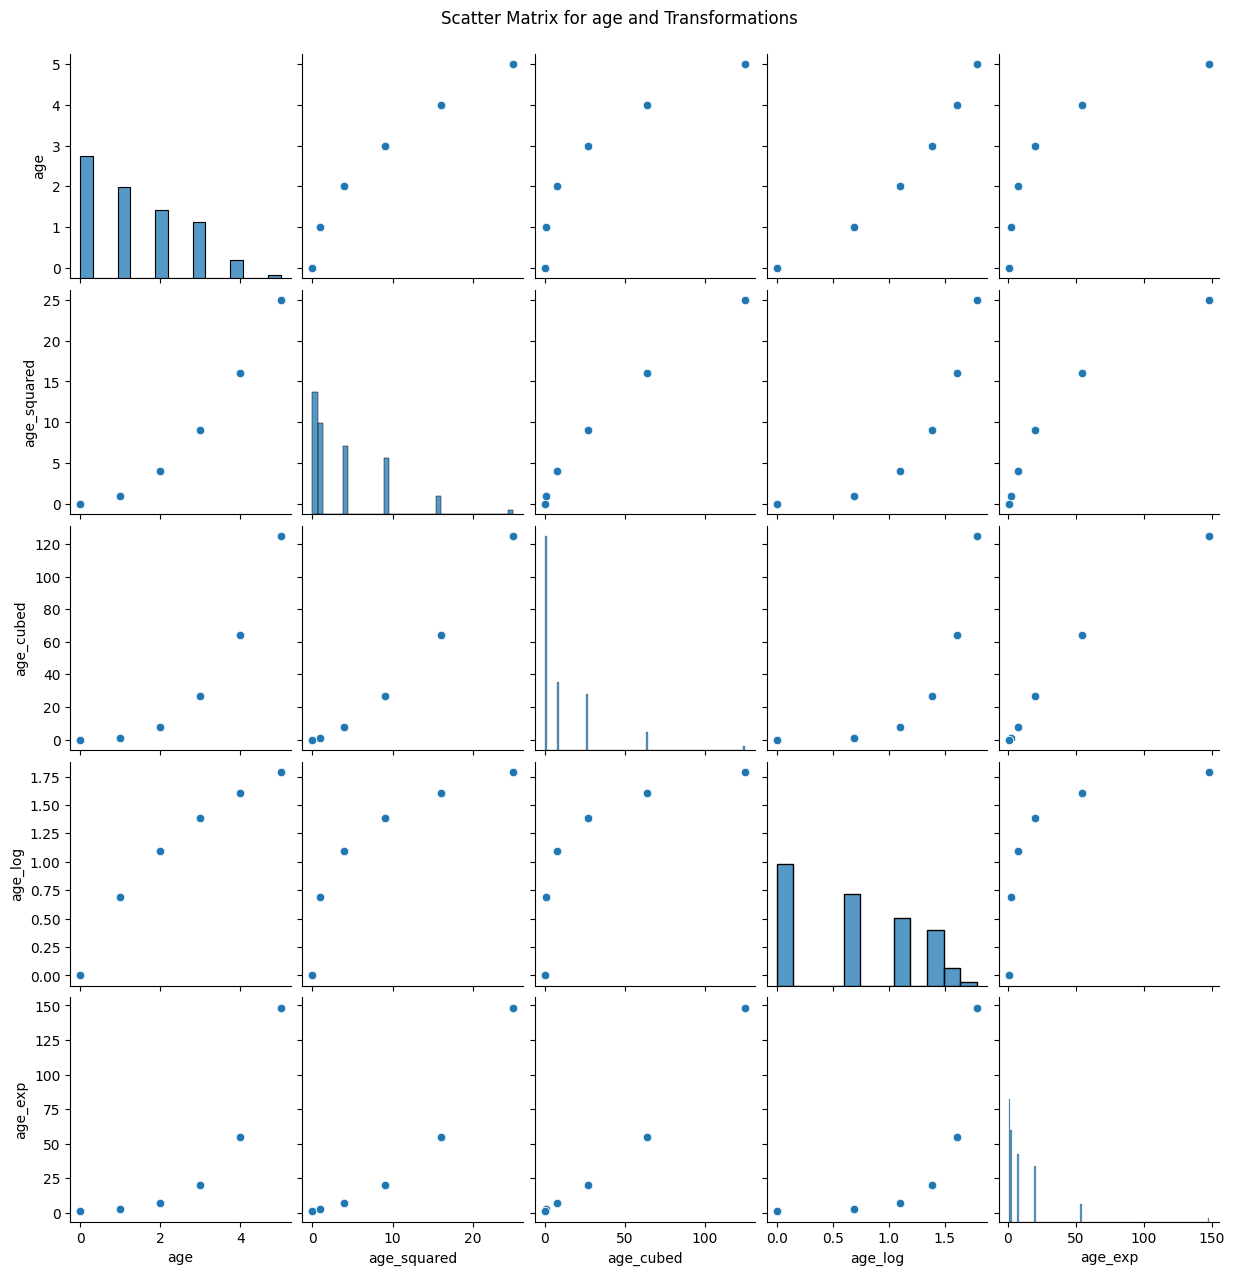

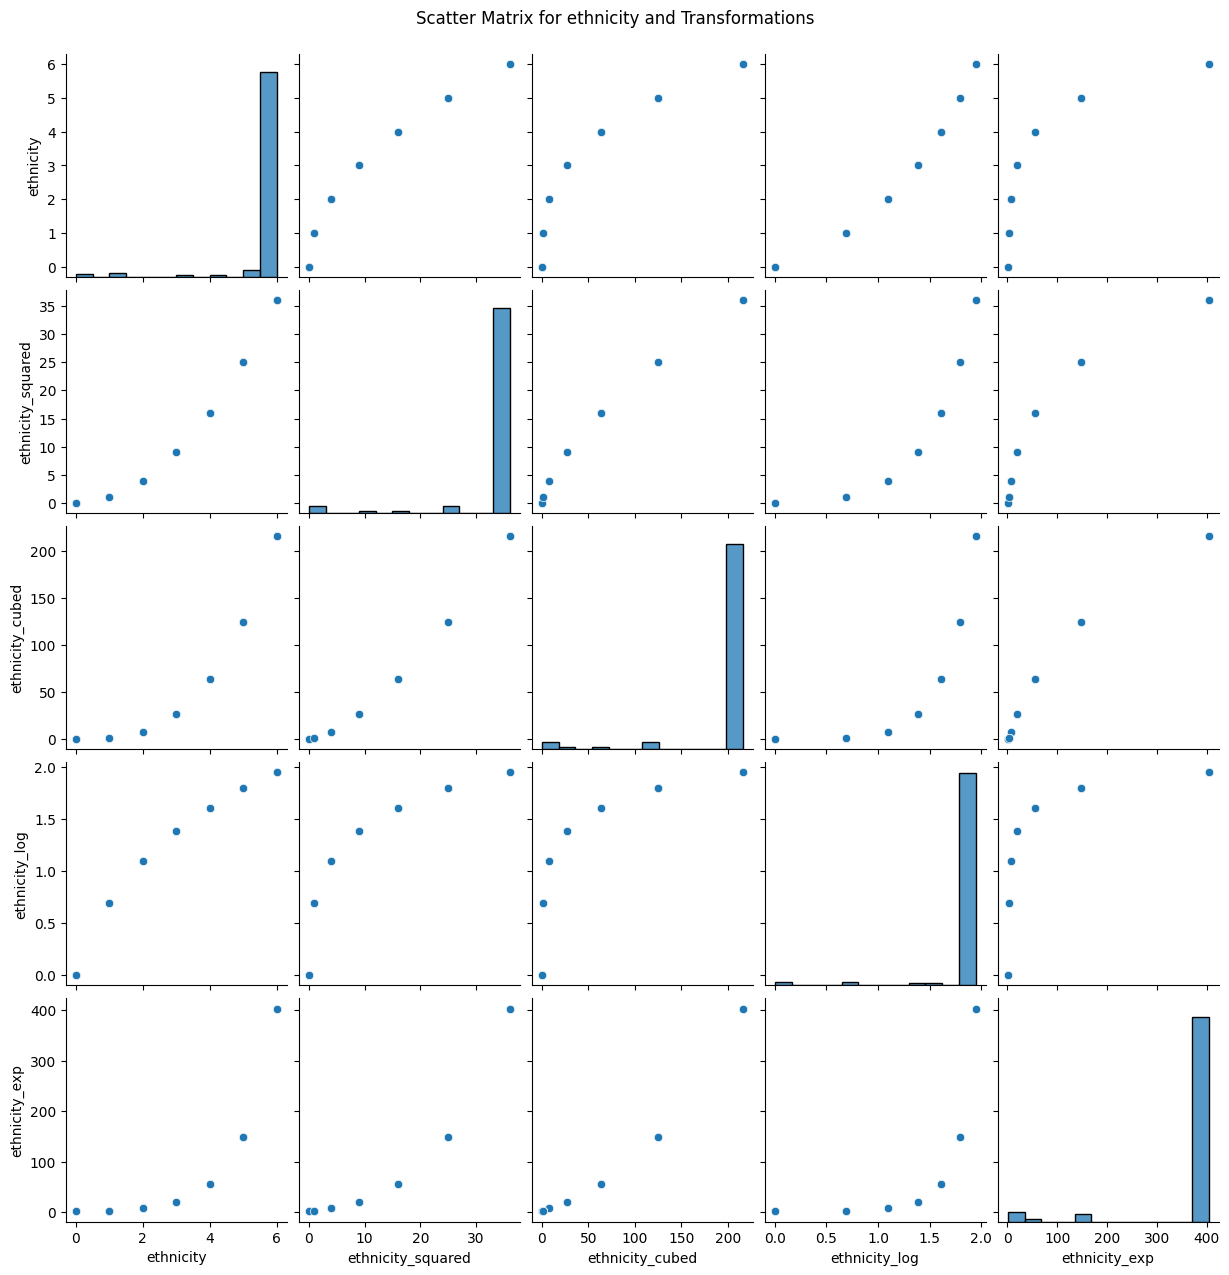

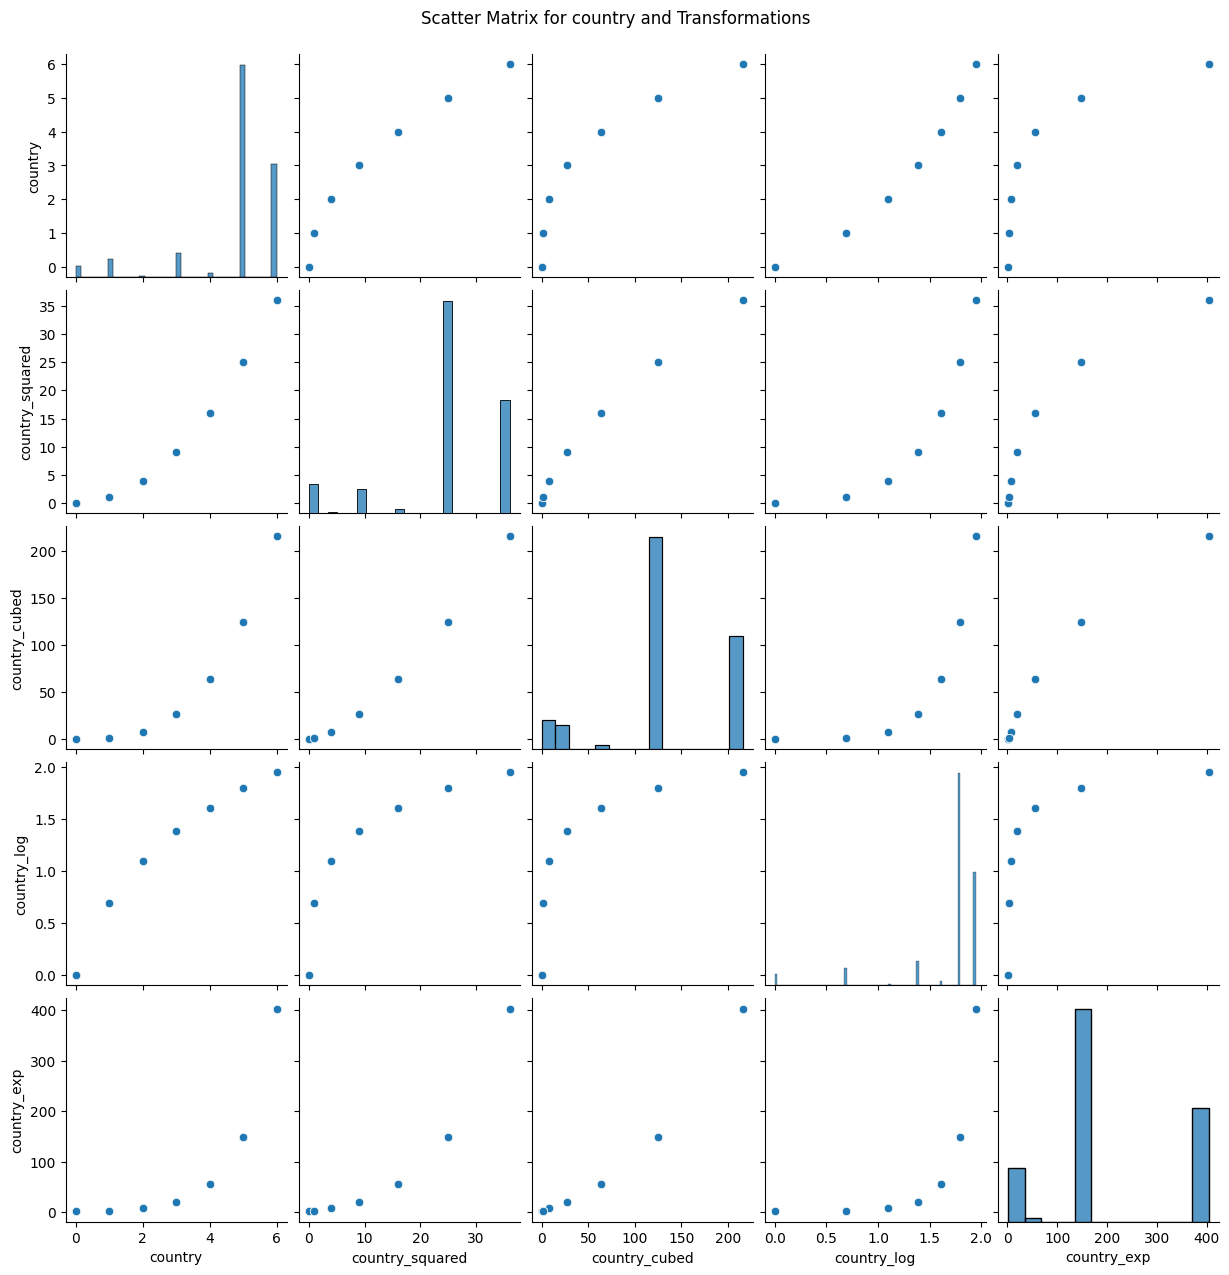

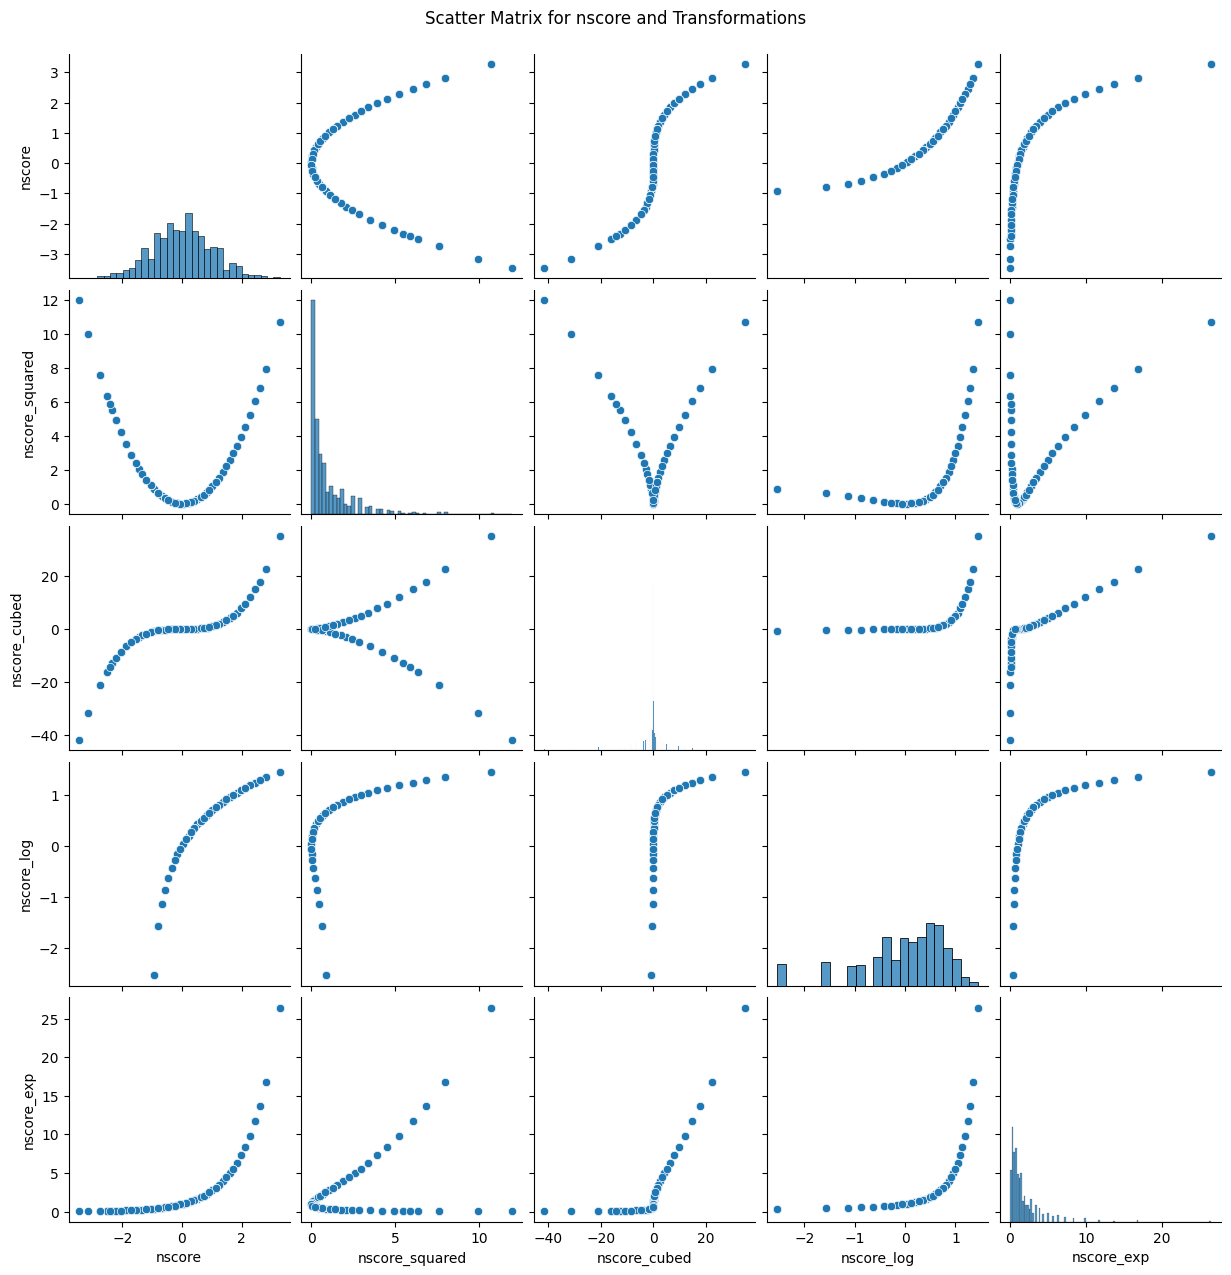

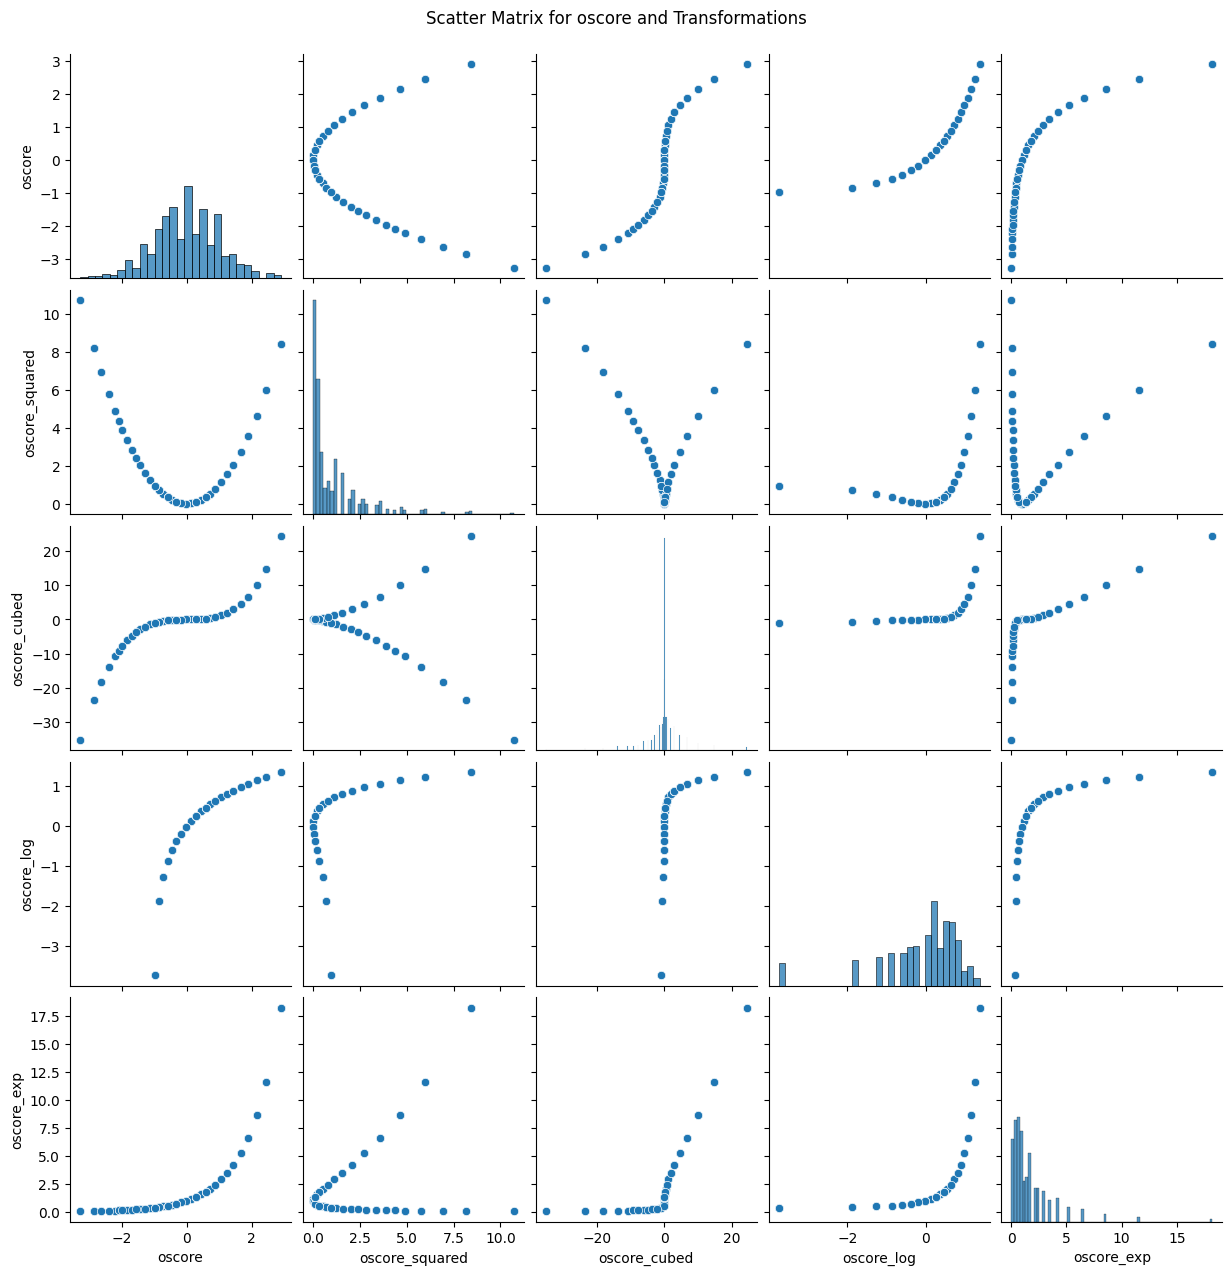

In [23]:

# Plot scatter matrices
for feature in features_to_transform:
    transformed_features = [feature, f'{feature}_squared', f'{feature}_cubed', f'{feature}_log', f'{feature}_exp']
    sns.pairplot(drug_consumption_df[transformed_features])
    plt.suptitle(f'Scatter Matrix for {feature} and Transformations', y=1.02)
    plt.show()